In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


> The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In [2]:
df15=(pd.read_csv("../input/world-happiness/2015.csv").drop(columns=["Standard Error","Dystopia Residual","Region"])
.rename(columns={"Economy (GDP per Capita)": "GDP",
                     "Health (Life Expectancy)": "Life",
                     "Trust (Government Corruption)": "Trust"}))

In [3]:
df15.insert(2,"Year",2015)

In [4]:
df16 = (pd.read_csv("../input/world-happiness/2016.csv").drop(columns=["Lower Confidence Interval","Upper Confidence Interval","Dystopia Residual","Region"])
.rename(columns={"Economy (GDP per Capita)": "GDP",
                     "Health (Life Expectancy)": "Life",
                     "Trust (Government Corruption)": "Trust"}))

In [5]:
df16.insert(2,"Year",2016)

In [6]:
df17 = (pd.read_csv("../input/world-happiness/2017.csv").drop(columns=["Whisker.high","Whisker.low","Dystopia.Residual"])
.rename(columns={"Happiness.Rank": "Happiness Rank",
                 "Happiness.Score": "Happiness Score",
                 "Economy..GDP.per.Capita.": "GDP",
                     "Health..Life.Expectancy.": "Life",
                     "Trust..Government.Corruption.": "Trust"}))

In [7]:
df17.insert(2,"Year",2017)

In [8]:
df18 = (pd.read_csv("../input/world-happiness/2018.csv").rename(columns={"Overall rank": "Happiness Rank",
                                               "Country or region": "Country",
                                               "Score": "Happiness Score",
                                               "GDP per capita": "GDP",
                                               "Social support": "Family",
                                               "Healthy life expectancy": "Life",
                                               "Freedom to make life choices": "Freedom",
                                               "Perceptions of corruption": "Trust"}))


In [9]:
df18.insert(2,"Year",2018)

In [10]:
df19 = (pd.read_csv("../input/world-happiness/2019.csv").rename(columns={"Overall rank": "Happiness Rank",
                                               "Country or region": "Country",
                                               "Score": "Happiness Score",
                                               "GDP per capita": "GDP",
                                               "Social support": "Family",
                                               "Healthy life expectancy": "Life",
                                               "Freedom to make life choices": "Freedom",
                                               "Perceptions of corruption": "Trust"}))

In [11]:
df19.insert(2,"Year",2019)

In [12]:
df = pd.concat([df15,df16,df17,df18,df19])

In [13]:
df.head()

,Country,Happiness Rank,Year,Happiness Score,GDP,Family,Life,Freedom,Trust,Generosity
0,Switzerland,1,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          782 non-null    object 
 1   Happiness Rank   782 non-null    int64  
 2   Year             782 non-null    int64  
 3   Happiness Score  782 non-null    float64
 4   GDP              782 non-null    float64
 5   Family           782 non-null    float64
 6   Life             782 non-null    float64
 7   Freedom          782 non-null    float64
 8   Trust            781 non-null    float64
 9   Generosity       782 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,782.0,78.698210,45.182384,1.000,40.000000,79.000000,118.000000,158.000000
Year,782.0,2016.993606,1.417364,2015.000,2016.000000,2017.000000,2018.000000,2019.000000
Happiness Score,782.0,5.379018,1.127456,2.693,4.509750,5.322000,6.189500,7.769000
GDP,782.0,0.916047,0.407340,0.000,0.606500,0.982205,1.236187,2.096000
Family,782.0,1.078392,0.329548,0.000,0.869363,1.124735,1.327250,1.644000
Life,782.0,0.612416,0.248309,0.000,0.440183,0.647310,0.808000,1.141000
Freedom,782.0,0.411091,0.152880,0.000,0.309768,0.431000,0.531000,0.724000
Trust,781.0,0.125436,0.105816,0.000,0.054000,0.091000,0.156030,0.551910
Generosity,782.0,0.218576,0.122321,0.000,0.130000,0.201982,0.278832,0.838075


<AxesSubplot:>

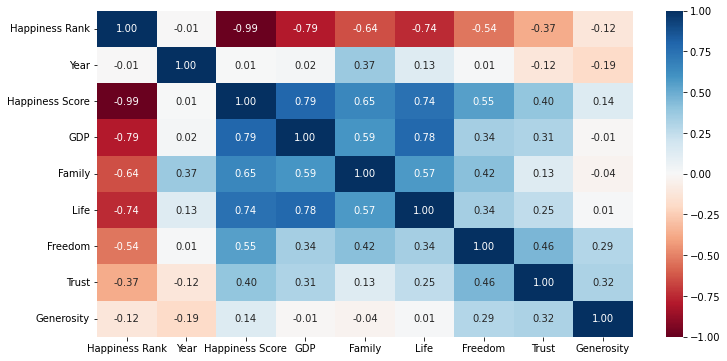

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
corr=df.corr()
sns.heatmap(corr, annot=True, cmap="RdBu",vmin=-1,vmax=1,fmt=".2f")

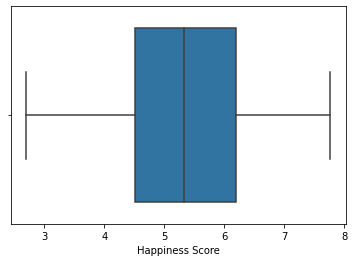

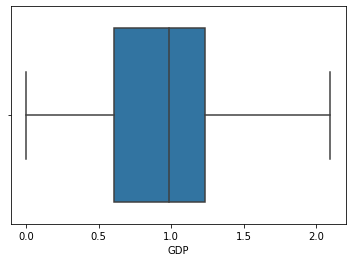

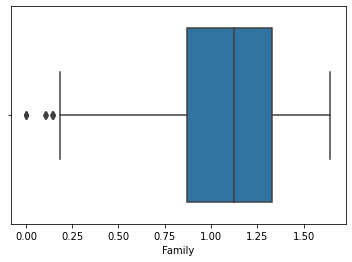

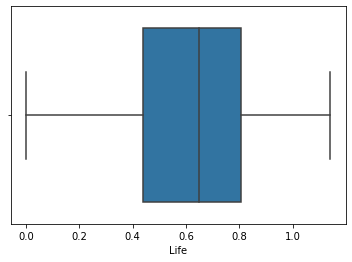

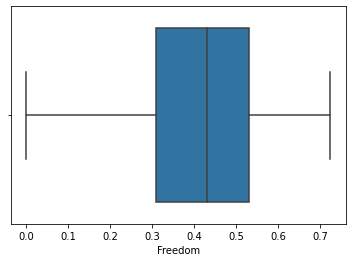

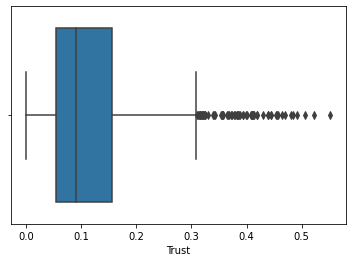

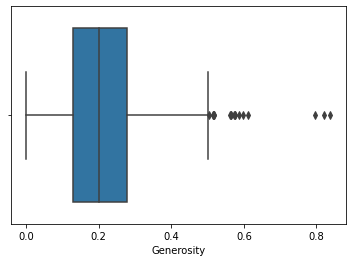

In [17]:
column_list = ["Happiness Score","GDP","Family","Life","Freedom","Trust","Generosity"]
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()

# Outlier Engineering

In [18]:
IQR = df["Trust"].quantile(0.75) - df["Trust"].quantile(0.25)

lower_boundary = df["Trust"].quantile(0.25) - (IQR * 1.5)
upper_boundary = df["Trust"].quantile(0.75) + (IQR * 1.5)
        
df["Trust"]= np.where(df["Trust"] > upper_boundary, upper_boundary,
                       np.where(df["Trust"] < lower_boundary, lower_boundary, df["Trust"])) 

<AxesSubplot:xlabel='Trust'>

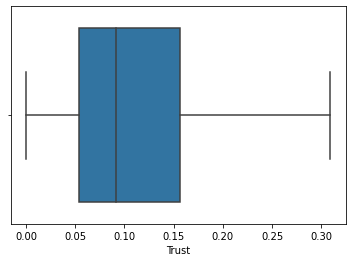

In [19]:
sns.boxplot(data=df,x="Trust")

In [20]:
IQR = df["Generosity"].quantile(0.75) - df["Generosity"].quantile(0.25)

lower_boundary = df["Generosity"].quantile(0.25) - (IQR * 1.5)
upper_boundary = df["Generosity"].quantile(0.75) + (IQR * 1.5)
        
df["Generosity"]= np.where(df["Generosity"] > upper_boundary, upper_boundary,
                       np.where(df["Generosity"] < lower_boundary, lower_boundary, df["Generosity"])) 

<AxesSubplot:xlabel='Generosity'>

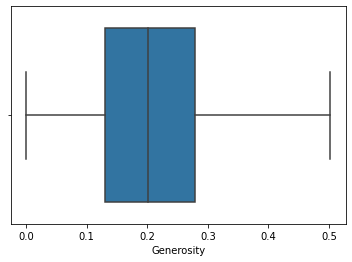

In [21]:
sns.boxplot(data=df,x="Generosity")

In [22]:
df.isnull().sum()

Country            0
Happiness Rank     0
Year               0
Happiness Score    0
GDP                0
Family             0
Life               0
Freedom            0
Trust              1
Generosity         0
dtype: int64

In [23]:
df["Trust"].fillna(df["Trust"].median(),inplace=True)

In [24]:
df.isnull().sum()

Country            0
Happiness Rank     0
Year               0
Happiness Score    0
GDP                0
Family             0
Life               0
Freedom            0
Trust              0
Generosity         0
dtype: int64

In [25]:
ndf = df.drop(columns=["Country","Happiness Rank"],axis=1)

In [26]:
ndf.head()

,Year,Happiness Score,GDP,Family,Life,Freedom,Trust,Generosity
0,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.309075,0.29678
1,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.141450,0.43630
2,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.309075,0.34139
3,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.309075,0.34699
4,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.309075,0.45811


In [27]:
ndf.shape

(782, 8)

In [28]:
from statsmodels.api import OLS

In [29]:
print(OLS(endog=ndf["Happiness Score"],exog=ndf.drop(columns="Happiness Score")).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.116e+04
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                        0.00
Time:                        17:16:36   Log-Likelihood:                         -634.69
No. Observations:                 782   AIC:                                      1283.
Df Residuals:                     775   BIC:                                      1316.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

[OLS nedir?](https://yigitsener.medium.com/makine-%C3%B6%C4%9Frenmesinde-python-ile-basit-do%C4%9Frusal-regresyon-modelinin-kurulmas%C4%B1-ve-yorumlanmas%C4%B1-4cf918e1adf)

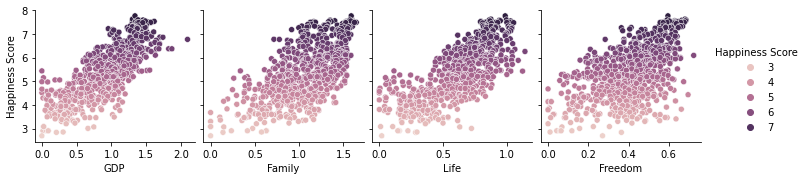

In [30]:
sns.pairplot(
    ndf,
    x_vars=["GDP","Family","Life","Freedom"],
    y_vars=["Happiness Score"],hue="Happiness Score"
)

# **Scale and Split**

In [31]:
X_train,X_test,y_train,y_test = train_test_split(ndf.drop(columns=["Happiness Score"]),ndf["Happiness Score"],test_size=0.12,random_state=0)

In [32]:
se = StandardScaler()

In [33]:
X_train = se.fit_transform(X_train)
X_test = se.fit_transform(X_test)

In [34]:
X_train.shape,X_test.shape

((688, 7), (94, 7))

In [35]:
y_train.shape,y_test.shape

((688,), (94,))

# Model Training

**Linear Regression** 

In [36]:
model_le = LinearRegression()

In [37]:
model_le.fit(X_train,y_train)

LinearRegression()

In [38]:
model_le.coef_

array([-0.11384853,  0.40136968,  0.2511459 ,  0.29073458,  0.20337351,
        0.1153736 ,  0.05264464])

In [39]:
model_le.intercept_

5.371375000449113

In [40]:
le_y_pred = model_le.predict(X_test)

In [41]:
print(f"Linear Regression Train Score: {model_le.score(X_train,y_train)}")

Linear Regression Train Score: 0.7669523127980397


In [42]:
cross_v=cross_val_score(model_le,X_train,y_train,cv=10,scoring="r2").mean()

In [43]:
print(f"Cross Validation Score: {cross_v}")

Cross Validation Score: 0.7540404465083413


In [44]:
l_test_score = r2_score(y_test,le_y_pred)

In [45]:
print(f"Linear Regression Test Score: {l_test_score}")

Linear Regression Test Score: 0.8118724269002047


In [46]:
from sklearn.model_selection import GridSearchCV

**Random Forest Regression** 

In [47]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [48]:
print("Random Forest Model Train Score:",rf_model.score(X_train,y_train)*100)
print("RF Cross Validation Score:",cross_val_score(rf_model,X_train,y_train,cv=10,scoring="r2").mean()*100)

Random Forest Model Train Score: 97.17906098725543
RF Cross Validation Score: 78.9280951234858


Random forest model overfitted.

**RF-Model Tuning**

In [49]:
rf_params= {"max_depth": list(range(1,10)),
             "max_features": [2,3,4,5],
            "n_estimators": [100,200,300,400,500] }

In [50]:
rf_model = RandomForestRegressor(random_state=42)

In [51]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1)

In [52]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [53]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 3, 'n_estimators': 500}

In [54]:
rf_tuned = RandomForestRegressor(max_depth= 9,max_features=3,n_estimators=500,random_state=42)

In [55]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, max_features=3, n_estimators=500,
                      random_state=42)

In [56]:
rf_y_pred=rf_tuned.predict(X_test)

In [57]:
rf_score=rf_tuned.score(X_train,y_train)
rf_test_score= r2_score(y_test,rf_y_pred)

In [58]:
print("Random Forest Train Score: ",rf_tuned.score(X_train,y_train))
print("Random Forest Cross Validation Score: ",cross_val_score(rf_tuned,X_train,y_train,cv=10,scoring="r2").mean())
print(f"Random Forest Test Score: {rf_test_score}")

Random Forest Train Score:  0.9483175021743371
Random Forest Cross Validation Score:  0.798957119574411
Random Forest Test Score: 0.8419700860795101


In [59]:
col_name = ndf.drop(columns="Happiness Score",axis=1)

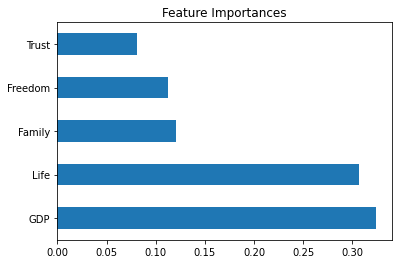

In [60]:
feat_importances = pd.Series(rf_tuned.feature_importances_, index=col_name.columns)
feat_importances.nlargest(5).plot(kind='barh').set_title("Feature Importances")
plt.show()

**Decision Tree Regression**

In [61]:
dt_model = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

In [62]:
dt_y_pred = dt_model.predict(X_test)

In [63]:
dt_test_score= r2_score(y_test,dt_y_pred)

In [64]:
print("Decision Tree Train Score: ",dt_model.score(X_train,y_train))
print("Decision Tree Cross Validation Score: ",cross_val_score(dt_model,X_train,y_train,cv=10,scoring="r2").mean())
print(f"Decision Tree Test Score: {dt_test_score}")

Decision Tree Train Score:  1.0
Decision Tree Cross Validation Score:  0.5747196048402465
Decision Tree Test Score: 0.6225220726707098


**DT - Hyperparameter Tuning**

In [65]:
param={"splitter":["best","random"],
            "max_depth" : np.arange(1,10,2),
           "min_samples_leaf":np.arange(1,10,2),
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80] }

In [66]:
dt=DecisionTreeRegressor()

In [67]:
dt_tuning = GridSearchCV(dt,param_grid=param,scoring="neg_mean_squared_error",cv=3)
dt_tuning.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([1, 3, 5, 7, 9]),
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [68]:
dt_tuning.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 9,
 'splitter': 'random'}

In [69]:
dt_tuned = DecisionTreeRegressor(max_depth = 7,max_features= "auto",max_leaf_nodes= 60,min_samples_leaf= 7,
                            splitter="random")

In [70]:
dt_tuned.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, max_features='auto', max_leaf_nodes=60,
                      min_samples_leaf=7, splitter='random')

In [71]:
dt_tuned_y_pred = dt_tuned.predict(X_test)

In [72]:
dt_tuned_test= r2_score(y_test,dt_tuned_y_pred)

In [73]:
print("Decision Tree Train Score: ",dt_tuned.score(X_train,y_train))
print("Decision Tree Cross Validation Score: ",cross_val_score(dt_tuned,X_train,y_train,cv=3,scoring="r2").mean())
print(f"Decision Tree Test Score: {dt_tuned_test}")

Decision Tree Train Score:  0.7686353592431873
Decision Tree Cross Validation Score:  0.6973569565901614
Decision Tree Test Score: 0.7491483502749686
